# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric and our analysis? 

- Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.

- Find the values of your new metrics.

- Report any other interesting findings.

Show all of your work in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Background operation

In [2]:
orders = pd.read_csv("orders.csv")
orders["order_value"].mean()

## 1. What went wrong?

The order value used for AOV is not for each sneaker. Instead, for example in order 16, the order value is the sum of 2000 sneakers. Because the range of total_itmes is huge, from 1 to 2000, the order value is not representative for each customer's behaviors. 

## 2. New Metrics

[1] Avg_value_each_sneaker = order_value / total_items
    
Meaningful because it can represent the consumption level of each consumer behind the orders. 

[2] Avg_orderV_cash, Avg_ordeV_credit, Avg_orderV_debit

Meaningful because they allow us to see the whether the payment method could reflect the consumption lvel. 

[3] shop_orderV = the total order value in all orders of one shop

Meaningful because it allows us to compare how popular each shop is. 

## 3. Values of new metrics

In [7]:
# [1] Avg_value_each_sneaker
orders['Avg_value_each_sneaker'] = orders['order_value'] / orders['total_items']
orders['Avg_value_each_sneaker'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: Avg_value_each_sneaker, dtype: float64

<AxesSubplot:title={'center':'Distribution of 8th Grade Reading Scores'}, ylabel='Frequency'>

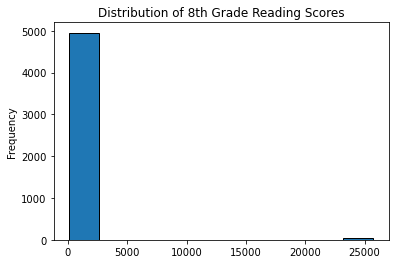

In [8]:
orders.Avg_value_each_sneaker.plot.hist(title="Distribution of 8th Grade Reading Scores", edgecolor="black")

In [10]:
len(orders[orders['Avg_value_each_sneaker']>20000])

46

In [13]:
# [2] Avg_orderV_cash, Avg_ordeV_credit, Avg_orderV_debit
orders.groupby('payment_method').order_value.mean()

payment_method
cash            730.353199
credit_card    7461.594813
debit           966.840215
Name: order_value, dtype: float64

In [18]:
# [3] shop_orderV = the total order value in all orders of one shop
orders.groupby('shop_id').order_value.mean().describe()

count       100.000000
mean       3136.834088
std       23935.881130
min         162.857143
25%         263.675962
50%         308.889758
75%         336.628352
max      235101.490196
Name: order_value, dtype: float64

<AxesSubplot:xlabel='shop_id'>

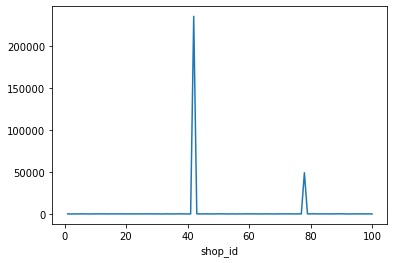

In [19]:
orders.groupby('shop_id').order_value.mean().plot()

## 4. Report any interesting findings

1. Regarding Avg_value_each_sneaker, we could find that the mean value of each item is 387, which is relatively normal, but the max value is more than 25000, and the overall distribution is weird. Considering the features of sneakers, I think the data of 46 orders which contains the average item value of more than $20000 might be wrong.

2. Regarding the payment method, we can find that the average order values of cash and debit cards are both smaller than 1000, while the average value of orders paid on credit cards is more than 7000. Because of such a huge difference, I think it might be necessary to check whether the orders paid by credit card are valid.

3. Regarding the order value in each shop, we can find a huge difference in the total order value. The 75% total order value is 336.6, while the max total order value is 235101.5. Combined with the result in [2], I think the next step might be to see whether the shops having abnormally huge total order values contain the most orders paid by credit card. If so, then I think it might be a signal of click farming.